# Load prediction of CT2 based on Ambient Conditions
### by analysis of ambient condition, deduce the ideal load of the machine using previous data
5 year data  
convert into single df  
part data into 80:20 ratio (80% training data and 20% test data)

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
#from pandas import ExcelWriter
#from pandas import ExcelFile
features = pd.read_excel('data/Ops Monthly Returns 2016.xls',
                   #skiprows = [0,1,3,4],            
                   #skipfooter= 48, #Number of rows to skip from bottom
                   usecols= "B:G", #Column index in Excel format
                   sheet_name=0)

In [2]:
print(features.columns)

X=features[features["Base_hours"]==24]
X

Index(['Amb_Temp_F', 'Avg_RH_Pct', 'Base_hours', 'Gen_MWH', 'Comp_eff',
       'lbtu'],
      dtype='object')


,Amb_Temp_F,Avg_RH_Pct,Base_hours,Gen_MWH,Comp_eff,lbtu
0,80.70,0.6210,24,1064,85.7,3726.33875
1,81.60,0.6280,24,1057,85.7,3717.33542
2,78.00,0.6310,24,1072,85.7,3673.16020
3,81.00,0.4790,24,1086,85.54,3699.77314
4,81.10,0.4830,24,1087,85.57,3691.26982
...,...,...,...,...,...,...
270,60.69,0.6341,24,1095,84.48,2173.76400
271,62.30,0.7090,24,1073,84.23,2187.78735
272,62.79,0.7565,24,1056,84.019,2204.02545
273,55.00,0.8900,24,1077,84.01,2069.59500


In [3]:
Y=X["Gen_MWH"]
Y

0      1064
1      1057
2      1072
3      1086
4      1087
       ... 
270    1095
271    1073
272    1056
273    1077
274    1070
Name: Gen_MWH, Length: 251, dtype: int64

In [4]:
X=X.drop(columns=["Gen_MWH"])
X

,Amb_Temp_F,Avg_RH_Pct,Base_hours,Comp_eff,lbtu
0,80.70,0.6210,24,85.7,3726.33875
1,81.60,0.6280,24,85.7,3717.33542
2,78.00,0.6310,24,85.7,3673.16020
3,81.00,0.4790,24,85.54,3699.77314
4,81.10,0.4830,24,85.57,3691.26982
...,...,...,...,...,...
270,60.69,0.6341,24,84.48,2173.76400
271,62.30,0.7090,24,84.23,2187.78735
272,62.79,0.7565,24,84.019,2204.02545
273,55.00,0.8900,24,84.01,2069.59500


In [5]:
# create training and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(200, 5) (200,)
(51, 5) (51,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)
predictions = model.predict(X_test)

Text(0, 0.5, 'Predictions')

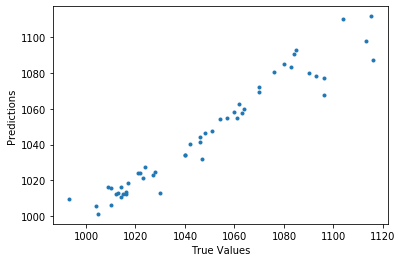

In [7]:
## The line / model
%matplotlib inline
plt.plot(Y_test, predictions,'.')
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [8]:
#d=y_test-predictions
Y_test.values-predictions

array([ 17.05611264,  -2.19735832,  -2.94941094,   3.79345636,
         0.33605878,   3.38423068,  -0.68488932,  -3.32132717,
         3.88771634,   9.7114175 ,   2.33971802,  28.22152027,
         0.15079409,   4.04573864,   1.77465916,  -5.74891831,
         1.70997158,  -1.83314871,  -1.98807584,  28.63629487,
         3.31917356,  -0.36649126,   3.89933777,   6.12277428,
        -7.14043423,  -1.64125294,   2.89079625,   1.47734864,
        -6.47076025,   3.15716774,   5.42204416,   1.80010264,
         4.57486224,   3.32374189,  14.99568985,  -1.60875447,
        -0.16057233,   1.56954726,  -4.7098153 ,  -7.79470943,
        -6.92212589,  18.45657777,   3.61981236, -16.46747926,
        14.97332808,  -0.16762509,  14.60841881,   2.23033647,
        -5.15479115,   5.81861432,   5.99921115])

In [9]:
X=X.drop(columns="Base_hours")
X

,Amb_Temp_F,Avg_RH_Pct,Comp_eff,lbtu
0,80.70,0.6210,85.7,3726.33875
1,81.60,0.6280,85.7,3717.33542
2,78.00,0.6310,85.7,3673.16020
3,81.00,0.4790,85.54,3699.77314
4,81.10,0.4830,85.57,3691.26982
...,...,...,...,...
270,60.69,0.6341,84.48,2173.76400
271,62.30,0.7090,84.23,2187.78735
272,62.79,0.7565,84.019,2204.02545
273,55.00,0.8900,84.01,2069.59500


In [10]:
# create training and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(200, 4) (200,)
(51, 4) (51,)


In [11]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)
predictions = model.predict(X_test)

Text(0, 0.5, 'Predictions')

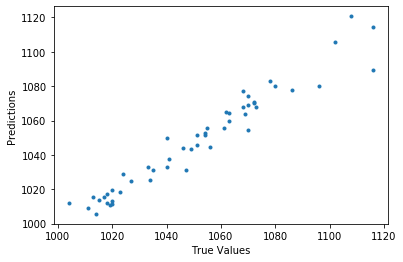

In [12]:
## The line / model
plt.plot(Y_test, predictions,'.')
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [13]:
#y_test['predictions'] = predictions
#y_test

In [14]:
# MSE (Mean Squared Error)
# sum(y-y')^2 / number of items
mse = np.sum((Y_test.values-predictions)**2)/Y_test.size
print(mse)
np.sqrt(np.average((Y_test.values-predictions)**2))

54.27525046525543


7.367173845190259

In [15]:
# Display weights and Bias of above Regression relation
for colnum in range(len(X.columns)):
    print("Weight for",X[X.columns[colnum]].name, model.coef_[colnum])
print()        
print("Bias:", model.intercept_)
print(model.coef_)

Weight for Amb_Temp_F -4.25234055793017
Weight for Avg_RH_Pct -209.38486951186013
Weight for Comp_eff 16.080941963417295
Weight for lbtu 0.012483261276770463

Bias: 110.87120038022056
[-4.25234056e+00 -2.09384870e+02  1.60809420e+01  1.24832613e-02]
